In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from datetime import date,datetime,timedelta
from dateutil.parser import parse

import json

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 문제 해결
rc('font', family='AppleGothic')

# 차트 축 <- 음수 부호 지원
plt.rcParams['axes.unicode_minus'] = False

In [2]:
dataset = pd.read_excel('/Users/iganghui/TIL/Python/Python_data_science/Data/mpg_visualization.xlsx',index_col=0,header=0)
display(dataset)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<AxesSubplot:>

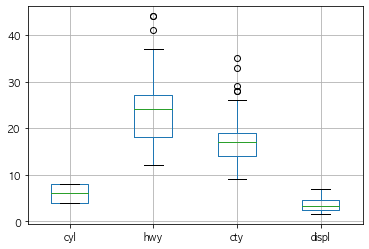

In [17]:
# 양적 자료의 데이터 분포 확인(boxplot)
dataset[['cyl','hwy','cty','displ']].boxplot()

In [22]:
# 질적 자료에 대한 데이터 빈도 확인
# 제조회사, 모델명, 변속기 종류, 구동방식, 연료종류, 자동차 종류 
dataset[['manufacturer']].value_counts()
dataset[['model']].value_counts()

model                 
caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
jetta                      9
mustang                    9
dakota pickup 4wd          9
impreza awd                8
grand cherokee 4wd         8
a4 quattro                 8
camry solara               7
a4                         7
passat                     7
camry                      7
durango 4wd                7
sonata                     7
tiburon                    7
f150 pickup 4wd            7
toyota tacoma 4wd          7
new beetle                 6
4runner 4wd                6
forester awd               6
explorer 4wd               6
altima                     6
gti                        5
c1500 suburban 2wd         5
corolla                    5
corvette                   5
grand prix                 5
malibu                     5
mountaineer 4wd            4
pathfinder 4wd             4
range rover                4
k1500 tahoe 4wd            4
expedition 2wd      

In [4]:
# 문제01]
# 자동차 배기량(displ)에 따라 고속도로 연비(hwy)가 다른지를 알아보자
# 배기량이 4 이하인 자동차화 5이상인 자동차 중 어떤 자동차의 고속도로연비가 평균적으로 
# 높은지 알아보자

print(dataset.query('displ<=4')['hwy'].mean())
print(dataset.query('displ>=5')['hwy'].mean())

25.96319018404908
18.07894736842105


In [6]:
# 문제 02]
# 자동차 제조 회사에 따라 도시 연비가 다른지 알아보려고 한다. 
# audi와 toyota 중 어느 manufacturer(자동차 제조 회사)의 cty(도시연비)가 평균적으로 더 높은지 알아보시오.

print(dataset.query("manufacturer=='toyota'")['cty'].mean())
print(dataset.query("manufacturer=='audi'")['cty'].mean())

18.529411764705884
17.61111111111111


In [13]:
# 문제 03]
# chevrolet, ford, honda 자동차의 고속도로 연비 평균을 알아보려고 한다. 
# 이 회사들의 데이터를 추출한 후 hwy 전체 평균을 확인하시오.

mask = dataset['manufacturer'].isin(['chevrolet','ford','honda'])
print(dataset[mask]['hwy'].mean())

print(dataset.query("manufacturer=='chevrolet'|manufacturer=='ford'|manufacturer=='honda'")['hwy'].mean())

print(dataset.query("manufacturer in ['chevrolet','ford','honda']")['hwy'].mean())

manufacturer_list = ['chevrolet','ford','honda']
print(dataset.query("manufacturer in @manufacturer_list")['hwy'].mean())

22.50943396226415
22.50943396226415
22.50943396226415
22.50943396226415


In [18]:
# 연료 가격 변수 추가 
# merge 이용
print('c : 가스 2.35 , d : 디젤 2.38 , e : 에탄올 2.11 , p : 고급휘발유 2.76, r : 보통휘발유 2.22')
dataset['fl'].unique()
temp_df = pd.DataFrame({'fl':['c','d','e','p','r'],
                        'price_fl':[2.35,2.38,2.11,2.76,2.22]})

merge_df = pd.merge(dataset,temp_df)
merge_df.head()

c : 가스 2.35 , d : 디젤 2.38 , e : 에탄올 2.11 , p : 고급휘발유 2.76, r : 보통휘발유 2.22


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76


In [20]:
# 병합한 프레임에서 model fl price_fl만 추출한다면?
merge_df.filter(['model','f1','price_fl'])


,model,price_fl
0,a4,2.76
1,a4,2.76
2,a4,2.76
3,a4,2.76
4,a4,2.76
...,...,...
229,grand cherokee 4wd,2.38
230,jetta,2.38
231,new beetle,2.38
232,new beetle,2.38


In [39]:
# 구동방식(drv) 별 고속도로 연비(hwy)평균
dataset.groupby('drv')[['hwy']].mean()

,hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [34]:
np.random.seed(100)
# 임의적으로 결측값 처리를 위해서 더미 값을 넣어보도록 하자
dataset_na = dataset.copy()
dataset_na.loc[dataset_na.sample(frac=0.4).index,'hwy'] = np.nan

# 데이터 전처리 과정에서 결측값 확인하기
print(dataset_na['hwy'].isna().any())
dataset_na.info()

True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           140 non-null    float64
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 30.0+ KB


           hwy
drv           
4    19.901639
f    28.030303
r    21.230769


<AxesSubplot:xlabel='drv'>

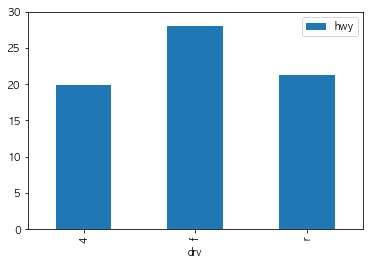

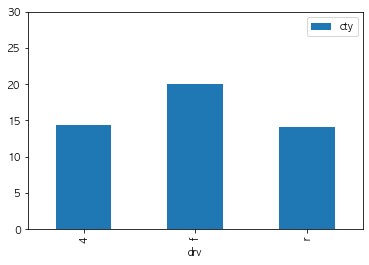

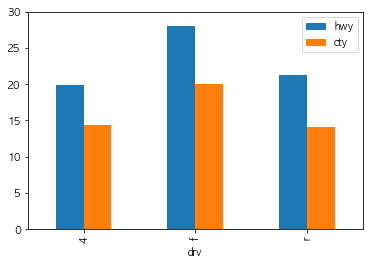

In [77]:
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
print(dataset_na.groupby('drv')[['hwy']].mean())

# 구동방식별 연비평균을 비교하기 위한 막대 그래프로 시각화 해 보자
# 구동방식별 고속도로, 도시연비의 평균을 구해보고 이를 데이터 프레임으로 만들어서 막대바로 시각화 해 보자
dataset_na.groupby('drv')[['hwy']].mean().plot(kind='bar',ylim=(0,30))
dataset_na.groupby('drv')[['cty']].mean().plot(kind='bar',ylim=(0,30))
dataset_na.groupby('drv')[['hwy','cty']].mean().plot(kind='bar',ylim=(0,30))

           hwy
drv           
4    19.901639
f    28.030303
r    21.230769


([<matplotlib.axis.XTick at 0x7f821c17a490>,
 [Text(1, 0, '4'), Text(2, 0, 'f'), Text(3, 0, 'r')])

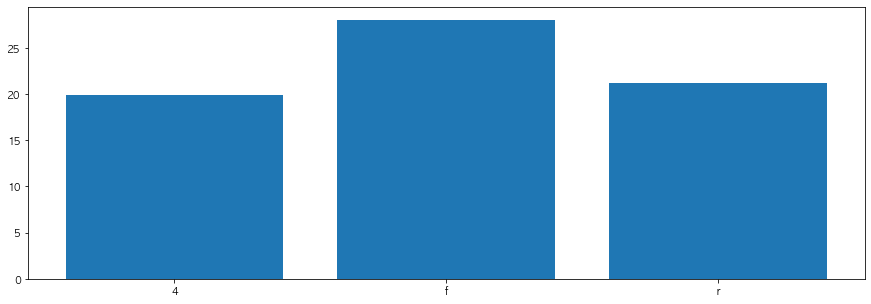

In [86]:
# 굳이 drop을 해줘야할까?
# pandas는  np.nan알아서 제외하고 계산을 해준다
# hwy변수의 결측값을 제외하고, 어떤 구동방식의 고속도로평균 연비가 높은지 알아보자
print(dataset_na.dropna(axis=0).groupby('drv')[['hwy']].mean())

label = dataset_na.dropna(axis=0).groupby('drv')['hwy'].mean().index.values
y = dataset_na.dropna(axis=0).groupby('drv')['hwy'].mean().values
plt.figure(figsize=(15,5))
plt.bar([1,2,3],y)
plt.xticks([1,2,3],label)

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64


<AxesSubplot:xlabel='class', ylabel='갯수'>

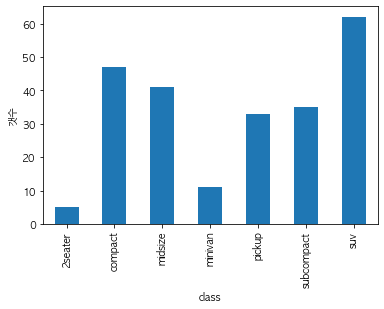

In [83]:
# 자동차(class)중에서 어떤 자동차가 가장 많으지 알아보려고 한다.
# 종류별 빈도를 막대바로 시각화 해 보자

class_series = dataset.groupby('class').size()
print(class_series)
display(class_series.plot(kind='bar',ylabel='갯수'))

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64


<AxesSubplot:ylabel='갯수'>

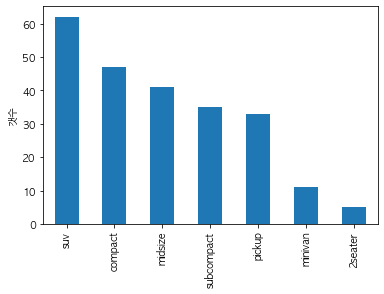

In [84]:
# value counts 쓰는게 더깔끔한거 같다 
class_series = dataset['class'].value_counts()
print(class_series)
display(class_series.plot(kind='bar',ylabel='갯수'))

,cty
manufacturer,
subaru,18.833333
toyota,14.375000
nissan,13.750000
jeep,13.500000
mercury,13.250000


<AxesSubplot:xlabel='manufacturer', ylabel='도시 연비'>

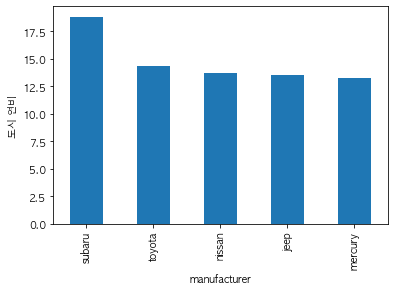

In [141]:
# 어떤 회사에서 생산한 suv 차종의 도시 엽니가 높은지를 알아보려고 한다
# suv 차종을 대상으로 평균 도시연비가 가장 높은 회사 다섯곳을 막대 바로 시각화 해 보자
suv_df = dataset[dataset['class']=='suv']
display(suv_df.groupby('manufacturer')[['cty']].mean().sort_values('cty',ascending=False).head(5))
suv_df.groupby('manufacturer')['cty'].mean().sort_values(ascending=False).head(5).plot(kind='bar',ylabel='도시 연비')

<AxesSubplot:>

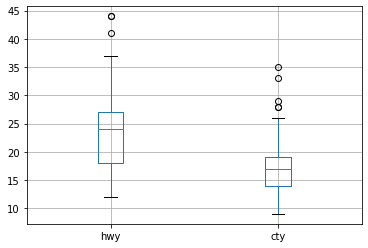

In [4]:
# 이상치 정제

# car_mpg 데이터에서 구동방식별 고속도로 연비 평균과 도시연비 평균을 극단치를 제외하고 확인
# 각 연비별 이상치 확인 boxplot()

dataset.filter(['drv','hwy','cty']).boxplot()

In [5]:
# 3사분위 정보를 얻어본다면
dataset[['cty','hwy']].quantile(0.75)

cty    19.0
hwy    27.0
Name: 0.75, dtype: float64

In [6]:
# 1사분위 정보를 얻어본다면
dataset[['cty','hwy']].quantile(0.25)

cty    14.0
hwy    18.0
Name: 0.25, dtype: float64

In [7]:
# IQR (3사분위 수 - 1사분위 수의 차)
dataset[['cty','hwy']].quantile(0.75) - dataset[['cty','hwy']].quantile(0.25)

cty    5.0
hwy    9.0
dtype: float64

In [8]:
# 최저 한계치(lower fence) 
low_whisker = dataset[['cty','hwy']].quantile(0.25) - 1.5*(dataset[['cty','hwy']].quantile(0.75) - dataset[['cty','hwy']].quantile(0.25))
low_whisker

cty    6.5
hwy    4.5
dtype: float64

In [9]:
# 최고 한계치(upper fence)
upper_whisker = dataset[['cty','hwy']].quantile(0.75) + 1.5*(dataset[['cty','hwy']].quantile(0.75) - dataset[['cty','hwy']].quantile(0.25))
upper_whisker

cty    26.5
hwy    40.5
dtype: float64

In [10]:
# 극단치 경계 값을 얻어 보자 (아래 수평선)
dataset[['cty','hwy']][dataset[['cty','hwy']]>low_whisker].min()
# 극단치 경계 값을 얻어 보자 (위 수평선)
dataset[['cty','hwy']][dataset[['cty','hwy']]<upper_whisker].max()

cty    26.0
hwy    37.0
dtype: float64

In [11]:
# 이상치만 추출
outlier_df = dataset.copy()
outlier_df.query('hwy>'+str(upper_whisker['hwy']))[['hwy']]

outlier_df.query('cty>'+str(upper_whisker['cty']))[['cty']]


,cty
100,28
197,28
213,33
222,35
223,29


In [12]:
# 이상치를 결측값으로 만들어주기
index = outlier_df.query('cty>'+str(upper_whisker['cty'])).index
outlier_df.loc[index,'cty']=np.nan

index = outlier_df.query('hwy>'+str(upper_whisker['hwy'])).index
outlier_df.loc[index,'hwy']=np.nan

outlier_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           229 non-null    float64
 8   hwy           231 non-null    float64
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 30.0+ KB


<AxesSubplot:>

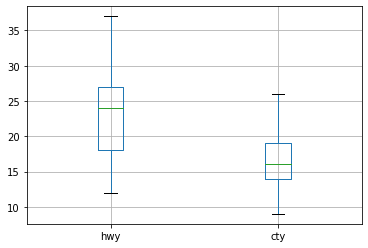

In [13]:
# 결측지는 자동으로 제외하고 박스 플랏이 생긴다
outlier_df[['hwy','cty']].boxplot()